In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data into a Pandas dataframe
df = pd.read_csv('/content/scores_data.csv')

df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [10]:
df.columns = [col.strip() for col in df.columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [12]:
print(df['Score'])
# convert 'Score' column to numeric type
df['Score'] = df['Score'].apply(lambda x: float(x.split(" / ")[0]) / float(x.split(" / ")[1]))
print(df['Score'])
# Group the df by batch and calculate the mean score for each batch
batch_scores = df.groupby('Batch')['Score'].mean()

# Print the mean scores for each batch
print("Mean scores by batch:")
print(batch_scores)

# Group the df by user_id and calculate the mean score for each user
user_scores = df.groupby('User_ID')['Score'].mean()

# Print the mean scores for each user
print("Mean scores by user:")
print(user_scores)

0      6 / 7
1      6 / 7
2      7 / 7
3      7 / 7
4      4 / 7
       ...  
144    4 / 7
145    4 / 7
146    4 / 7
147    3 / 7
148    2 / 7
Name: Score, Length: 149, dtype: object
0      0.857143
1      0.857143
2      1.000000
3      1.000000
4      0.571429
         ...   
144    0.571429
145    0.571429
146    0.571429
147    0.428571
148    0.285714
Name: Score, Length: 149, dtype: float64
Mean scores by batch:
Batch
AI_ELITE_4    0.541667
AI_ELITE_6    0.604167
AI_ELITE_7    0.722372
Name: Score, dtype: float64
Mean scores by user:
User_ID
uid_1      0.285714
uid_10     1.000000
uid_100    0.428571
uid_101    0.857143
uid_102    0.571429
             ...   
uid_95     0.571429
uid_96     0.428571
uid_97     0.428571
uid_98     0.571429
uid_99     0.285714
Name: Score, Length: 149, dtype: float64


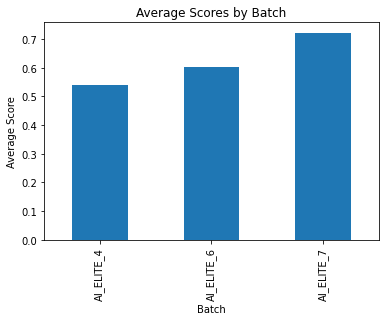

In [17]:
batch_scores.plot(kind='bar', legend=False)
plt.title('Average Scores by Batch')
plt.xlabel('Batch')
plt.ylabel('Average Score')
plt.show()

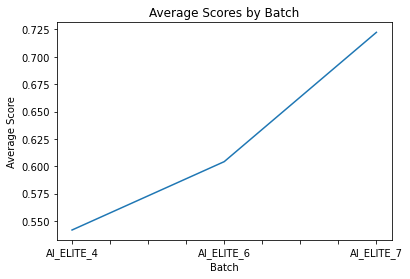

In [16]:
batch_scores.plot(kind='line', legend=False)
plt.title('Average Scores by Batch')
plt.xlabel('Batch')
plt.ylabel('Average Score')
plt.show()

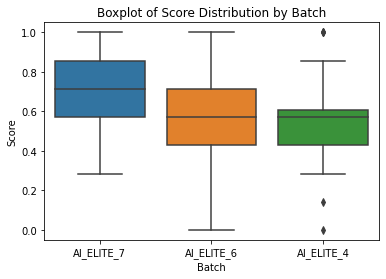

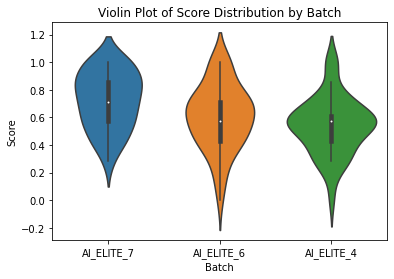

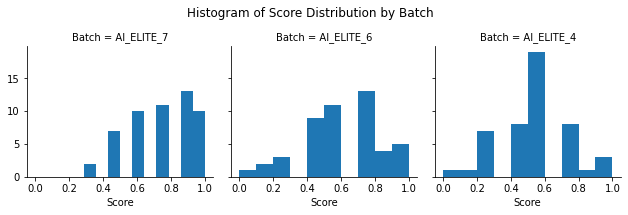

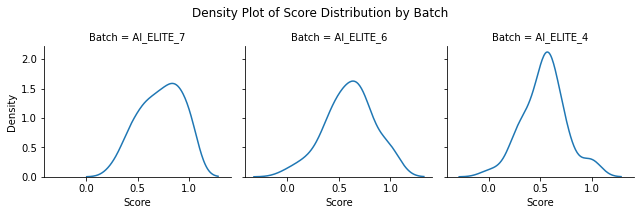

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each batch's score distribution
sns.boxplot(x='Batch', y='Score', data=df)
plt.title('Boxplot of Score Distribution by Batch')
plt.show()

# Violin plot for each batch's score distribution
sns.violinplot(x='Batch', y='Score', data=df)
plt.title('Violin Plot of Score Distribution by Batch')
plt.show()

# Histogram of score distribution for each batch
g = sns.FacetGrid(df, col='Batch', margin_titles=True)
g.map(plt.hist, 'Score')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Histogram of Score Distribution by Batch')
plt.show()

# Density plot of score distribution for each batch
g = sns.FacetGrid(df, col='Batch', margin_titles=True)
g.map(sns.kdeplot, 'Score')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Density Plot of Score Distribution by Batch')
plt.show()


#Conclusion

There is 2-3 outliers in AI_ELITE_4.
The Overall average of Mean scores by batch:
Batch


1.   AI_ELITE_4    0.541667
2.   AI_ELITE_6    0.604167
3.   AI_ELITE_7    0.722372



We have plot the data with different graphs and got diffrent desired results.